<a href="https://colab.research.google.com/github/Q12976433/ass2/blob/master/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

github link:
https://github.com/yilanqingzhong/UTS_ML2019_ID12828277/blob/master/Assignment2.ipynb

# Introduction



---
12976433 Shuting Xu

12828277 Yilanqing Zhong


---





As a well-known homestay rental application, Airbnb provides more possibilities and customized accommodation choices to a bulk number of guests and hosts.
 
This notebook analyzes an open dataset about Airbnb in New York for 2019, including the home information, geographical availability, guest stay nights, and so on. Accordingly, this large dataset inspired several problems for exploration: what is the importance between the hosts' location and price, what does the prediction of different attributes mean, and which rooms are most popular and the reason.
 
This essay plays an important role in analyzing and predicting the Airbnb dataset for both guests and hosts. As for guests, firstly they can find out which rooms or which time period are available, then notice the price range of different room type in different areas and get a highly cost-effective in certain areas after comparison, finally the analysis of reviews from hosts can help them connect with the well-reviewed hosts to arrange their trip. In terms of hosts, they can base on this prediction to set price for different rooms according to a different location as well as room type and set available date range, and minimum stay to avoid high volume of vacancy, even observe the reviews to improve the accommodation experience for the guest.
 
Therefore, both guests and hosts can benefit from the prediction, to save accommodation expense or increase Airbnb income.

# **Exploration**

To do prediction and analysis, understanding and exploring the data, i.e. identifying challenges and designing data structures, are firstly needed. The dataset which is used is from Kaggle, namely New York City Airbnb Open Data.

## Prepare Data

In [0]:
#Clone directory
!git clone https://github.com/Q12976433/ass2.git

Cloning into 'ass2'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (16/16), done.


In [0]:
#Check content
!pwd
!ls -R

/content
.:
ass2  sample_data

./ass2:
AB_NYC_2019.csv  New_York_City_.png  README.md	tester.csv  Untitled7.ipynb

./sample_data:
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


## Initla Data

In [0]:
#Import essential and necessary libraries for following analysis
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

In [0]:

from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error,r2_score


In [0]:
#Import Airbnb New York City dataset
df = pd.read_csv('./ass2/AB_NYC_2019.csv')

The First glances of the dataset are shown below:

In [0]:
#Check the head of the dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [0]:
#Check the detailed information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

After importing and checking the dataset, it is clear that there are approximately 49,000 rows with 16 attributes in the dataset, including both categorical and numeric values. With such an abundant amount of information, deep exploration can be conducted. However, a challenge here is that useful attributes which work for prediction are needed to be decided.

## Understand Data 

According to the detailed information of the dataset, there are some missing values included in the dataset.

In [0]:
#Check missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In this case, the attributes which conatin missing values can be dropped. One reason is that some categorical attributes such as 'name' and 'host_name' are not relevant and important to the analysis. Another reason is that these attributes refer to private information. As for attributes related to 'reviews', and they are highly affected by the subject behaviour of tenants; hence, they are not relevant to further exploration.

It is also beneficial to recognize the unique values of categorical attributes.

In [0]:
#Check unique values
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [0]:
#Check unique values
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [0]:
#Check unique values
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

It is worth noting that 'neighbourhood' is included in 'neighbourhood_group', and it can be represented by longitude and latitude. Therefore, this attribute can be omitted.

In [0]:
#Check the statistics
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


It is also clear that the standard variance of 'price' and 'availability_365' are apparently higher than other attributes. Therefore, another challenge here is that outliers in this dataset need to be excluded for the sake of prediction accuracy. Otherwise, as shown in the figure below, the chromatic aberration between each point is difficult to distinguish from each other.

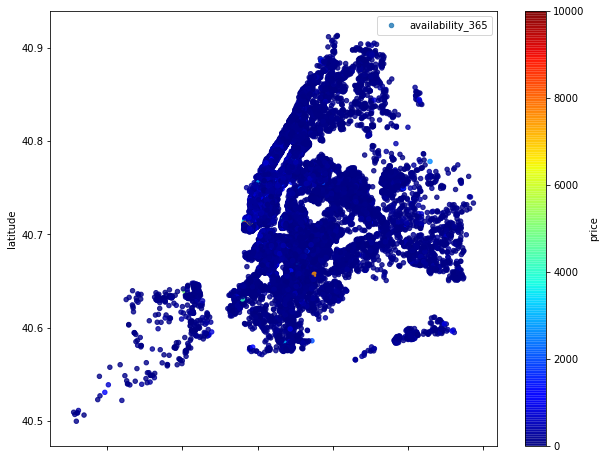

In [0]:
#Produce a scatter heatmap based on price
df_heatmap=df.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.8, figsize=(10,8))
df_heatmap.legend()

## Visualise and Examine the Aspect of Interest

Since longitude and latitude can be used to determine a point, the distribution of 'neighbourhood_group' can be visualized below:

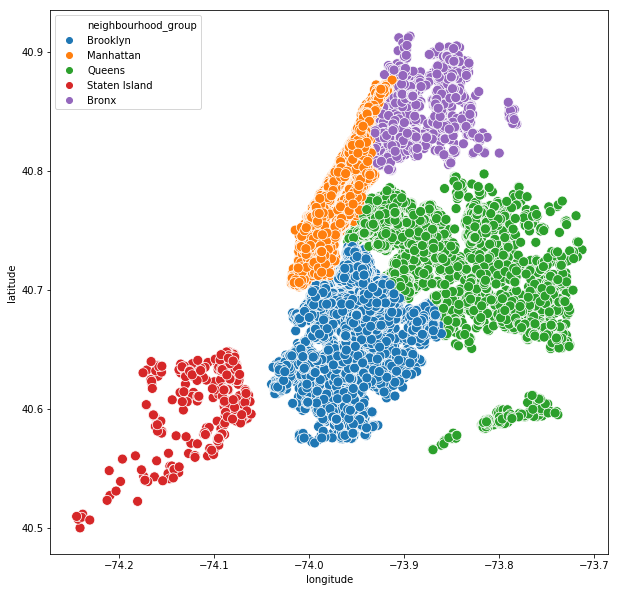

In [0]:
#Check the distribution of 'neighbourhood_group'
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=100, data=df)
plt.show()

In [0]:
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


based on the correlation rate between price and other attributes, we choose five close attributes:
longitude, latitude ,neighborhood_group,availability_365 and room_type

Further, an animation graph can be demonstrated with attributes which we are interested.

In [0]:
#Sort the attribute 'availability_365'
df= df.sort_values(by=['availability_365'])
#Produce an animation graph changed with available day
Distribution = px.scatter(df, x = "longitude", y = "latitude", color= "neighbourhood_group",size = "price", animation_frame='availability_365', hover_name = "room_type", size_max = 100)
Distribution.show()

## Preprocessing Data


After visualizing, the next step is data prepreocssing, including converting strings into number, selecting attributes, and cleaning the outliers of the dataset. It is noted that IQR technique is used to remove the data which contains many 0s and too large values.

In [0]:
# convert str to int
df['neighbourhood_group'] = df['neighbourhood_group'].astype('category').cat.codes
df['room_type']=df['room_type'].astype('category').cat.codes

In [0]:
#IQR is for outlier cleaning, to drop the too large or too small data.
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
IQR = q3 - q1
df = df[~((df < (q1 - 1.5 * IQR)) |(df > (q3 + 1.5 * IQR))).any(axis=1)]
print(df)

Based on the correlations between other attributes and 'price', 'neighbourhood_group', 'longitude', 'latitude', 'room_type', and 'availability_365' are selected to form the prediction model for 'price'.
For the predction model, two models are proposed: Decision Tree and K-Nearest Neighbor. And the efficiency of these two models will be compared in the next section.

Data partitioning can be carried out through sklearn. 80% of the data is divided into training set and the rest into test set. Y_train and Y_test represent ‘price’ in training and testing set, while X_train and X_test are relative attributes in corresponding set. 

In [0]:
#SPLIT
Y = df['price']
choosed_column = df[['neighbourhood_group','longitude','room_type', 'availability_365','latitude']]


X = preprocessing.scale(choosed_column)
X = np.hstack((np.ones( (len(df['price']) ,2)), X))
print(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,random_state=1)


Decision trees can produce feasible and effective results for large data in a relatively short time.
KNN is insensitive to outliers and can be used for both numeric and discrete data, and knn can be used to handle the columns in real world which are not very mathematical.

# METHODOLOGY

Regression algorithms is a classical supervised machine learning algorithm, which can predict the target value with the values of input attributes and explore the relationships of attributes, the purpose is same with classification algorithm, but the function of regression algorithm is to output the numerical variables, and the classification is for predicting categorical outputs. Our target value is ‘price’, so regression should be the best choice.

KNN and decision tree are common models and familiar to us. We import KNN regressor and decision tree regressor into the project.

In [0]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor(random_state=0, max_depth=2)

During the implementation procedure, we found there are many parameters in Decision Tree model such as max_depth, min_samples_leaf and the main factor of KNN is n_neighbor 
In sklearn, GridSearchCV has fit and scoring functions; the parameters estimator use these functions to optimize via CV(cross-validation)grid.

Param_grid creates a dictionary for parameters name, and their parameter settings search each sequence of parameter settings
The estimator object has a scoring function to a rank sequence of parameter settings, and users can print the sequence with the best score. In this case, we got the best parameter values to optimize the following model.

CV is cross-validation generator; we can define the number of consecutive times with different split. In the project, we set 5 to cv, so 20% dataset would be out of sample for the training set. 

As for Decision Tree model, we applied the best parameter after search cv to max_depth, min_samples_leaf, min_samples_split, min_weight_fraction_leaf, random_state.
Max_depth: the maximum depth of the Decision Tree, to limit the Decision Tree size and avoid overfitting.
min_samples_leaf: a leaf node must have more samples than the min_samples_leaf. This function can smooth the regression model
min_samples_split: the minimum number of samples should require splitting an internal node.
min_weight_fraction_leaf: the minimum weight fraction of the total value among all input value weight, a node should have weight more than min_weight_fraction_leaf.

random_state provides seed numbers to label the random state object; in our project, each random split of cross-validation is the random_state. Which can guarantee we get the same results of sample each sequence to avoid unnecessary variables?

In [0]:
#choose the best parameters for decision tree models
from sklearn.model_selection import GridSearchCV
parameter = [{'max_depth': np.arange(1, 5),
              'min_samples_leaf': [1, 5, 10, 20, 50],
              'min_samples_split':[2,4],
              'min_weight_fraction_leaf': [0.0,0.1,0.3,0.5],
              'random_state':[1,3,4,7,9]}]
CV = GridSearchCV(estimator=model_tree, param_grid=parameter,cv=5)
CV = CV.fit(X_train, Y_train)

print(CV.best_score_)
print(CV.best_params_)


0.48411500418717407
{'max_depth': 4, 'min_samples_leaf': 50, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 1}



After searchCV, we got the optimization parameter setting for decision tree regressor and applied them into the model.
'max_depth': 4,
'min_samples_leaf': 50,
'min_samples_split': 2, 
'min_weight_fraction_leaf': 0.0, 
'random_state': 1

In [0]:
model_tree = DecisionTreeRegressor(max_depth=4,min_samples_leaf=5,min_samples_split=2,min_weight_fraction_leaf=0.0,random_state=1)

Y_train_predict is the prediction result of X training set, while y_test_predict is the prediction result of X test set.


In [0]:
model_tree.fit(X_train,Y_train)
Y_train_predict = model_tree.predict(X_train)
Y_test_predict = model_tree.predict(X_test)

In [0]:
#for scoring the model
rmse = (np.sqrt(mean_squared_error(Y_test,Y_test_predict)))
score = (model_tree.score(X_train,Y_train)*100)
print("This is the performance of DecisionTree ")
print("**"*15)
#print("score is %s  "  % score)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(Y_train, Y_train_predict),
        mean_squared_error(Y_test, Y_test_predict)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(Y_train, Y_train_predict),
        r2_score(Y_test, Y_test_predict)))







This is the performance of DecisionTree 
******************************
MSE train: 2273.201, test: 2268.350
R^2 train: 0.489, test: 0.490


In [0]:
#Compare the error between Actual value and Predicted value
error_frame = pd.DataFrame({'Actual value': np.array(Y_test).flatten(), 'Predicted value': Y_test_predict.flatten()})
error_frame.head(10)

,Actual value,Predicted value
0,240,161.638489
1,125,130.816135
2,99,161.638489
3,60,72.359080
4,85,72.359080
5,154,84.780942
6,200,161.638489
7,45,72.359080
8,150,165.218274
9,150,135.001818


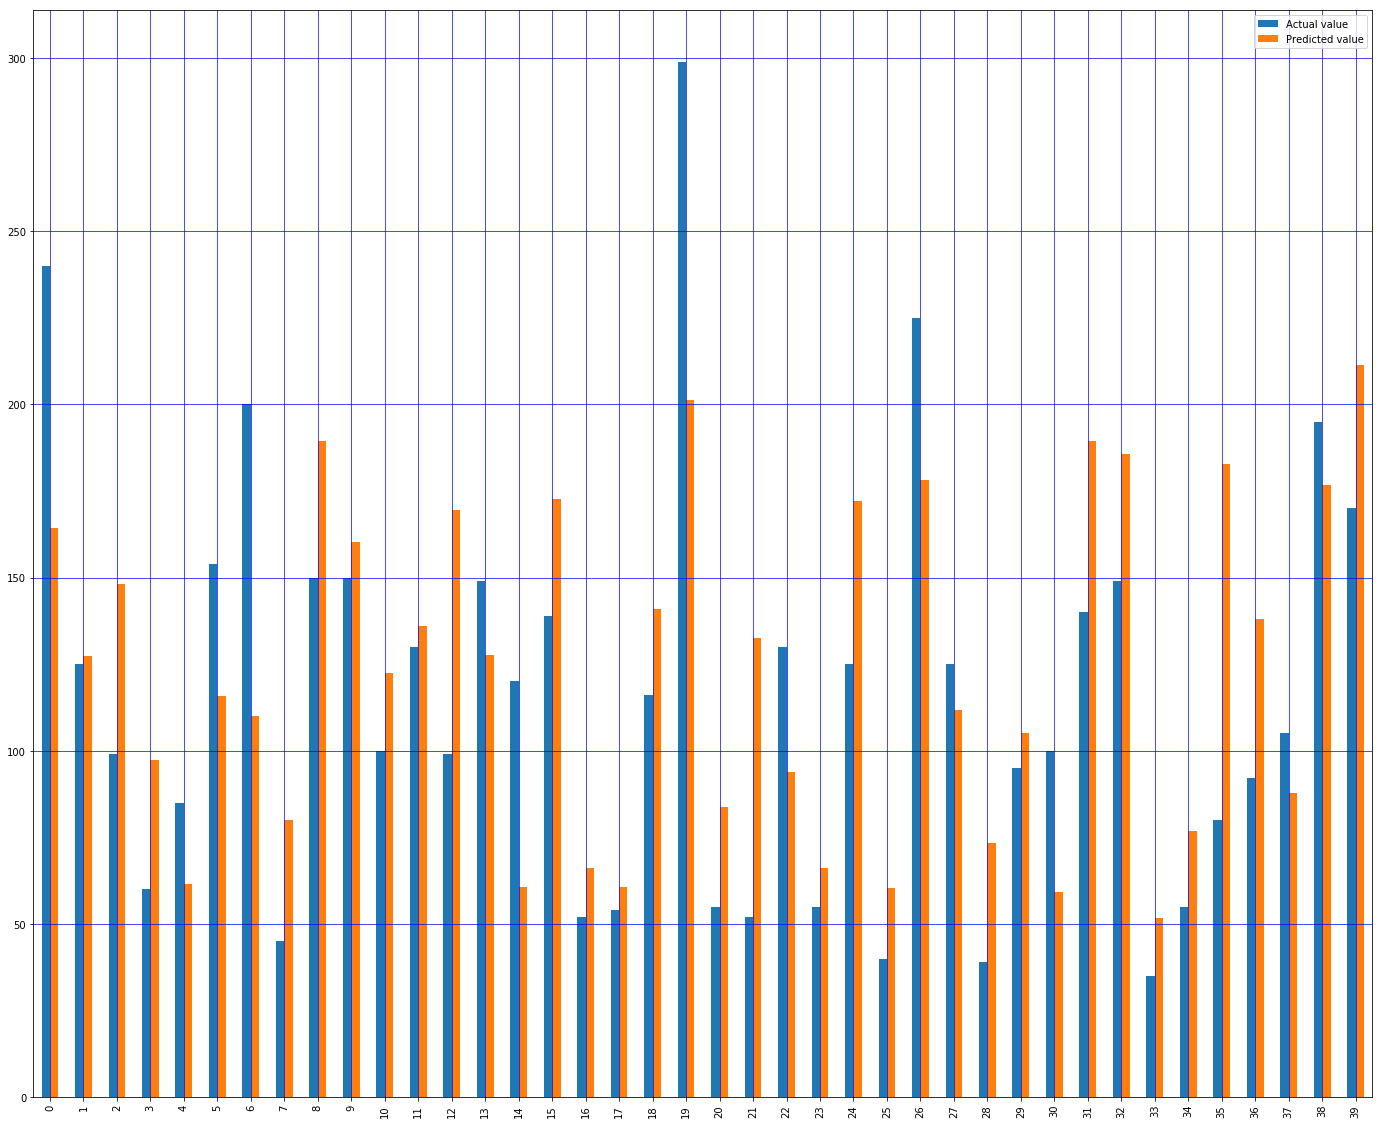

In [0]:
#visulize the error frame for observation
aa = error_frame[:40]
aa.plot(kind='bar',figsize=(24,20))
plt.grid(which='major', linestyle='-', linewidth='0.7', color='green')
plt.grid(which='major', linestyle='-', linewidth='0.7', color='blue')
plt.show()

In [0]:
from sklearn.neighbors import KNeighborsRegressor
knn =KNeighborsRegressor()
knn.fit(X_train,Y_train)



KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In terms of KNN, n_neighbor is the main feature, dermining how many number of neighbors would be used.
The same procedure of searchCV is applied to find the most appropriate n_neighbor value in given range

In [0]:
parameterknn = [{'n_neighbors': np.arange(3,13),
              }]
CV = GridSearchCV(estimator=knn, param_grid=parameterknn,cv=5)
CV = CV.fit(X_train, Y_train)

print(CV.best_score_)
print(CV.best_params_)



0.5022535042083452
{'n_neighbors': 12}


 12 is the best one, and we used it to KNNmodel.
{'n_neighbors': 12}


In [0]:
knn =KNeighborsRegressor(12)
knn.fit(X_train,Y_train)
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

In [0]:
rmse = (np.sqrt(mean_squared_error(Y_test,y_test_predict)))
print("this is the performance of KNN ")
print("**"*15)
#print("correlation coefficient  is %s" % knn.coef_)
score = (knn.score(X_train,Y_train)*100)
#print("score is %s  "  % score)
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(Y_train, y_train_predict),
        mean_squared_error(Y_test, y_test_predict)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(Y_train, y_train_predict),
        r2_score(Y_test, y_test_predict)))

this is the performance of KNN 
******************************
MSE train: 1871.894, test: 2204.375
R^2 train: 0.579, test: 0.504


In [0]:
#Compare the error between Actual value and Predicted value
error_frame = pd.DataFrame({'Actual value': np.array(Y_test).flatten(), 'Predicted value': y_test_predict.flatten()})
error_frame.head(10)


,Actual value,Predicted value
0,240,164.250000
1,125,127.416667
2,99,148.166667
3,60,97.416667
4,85,61.583333
5,154,115.666667
6,200,110.000000
7,45,80.083333
8,150,189.333333
9,150,160.166667


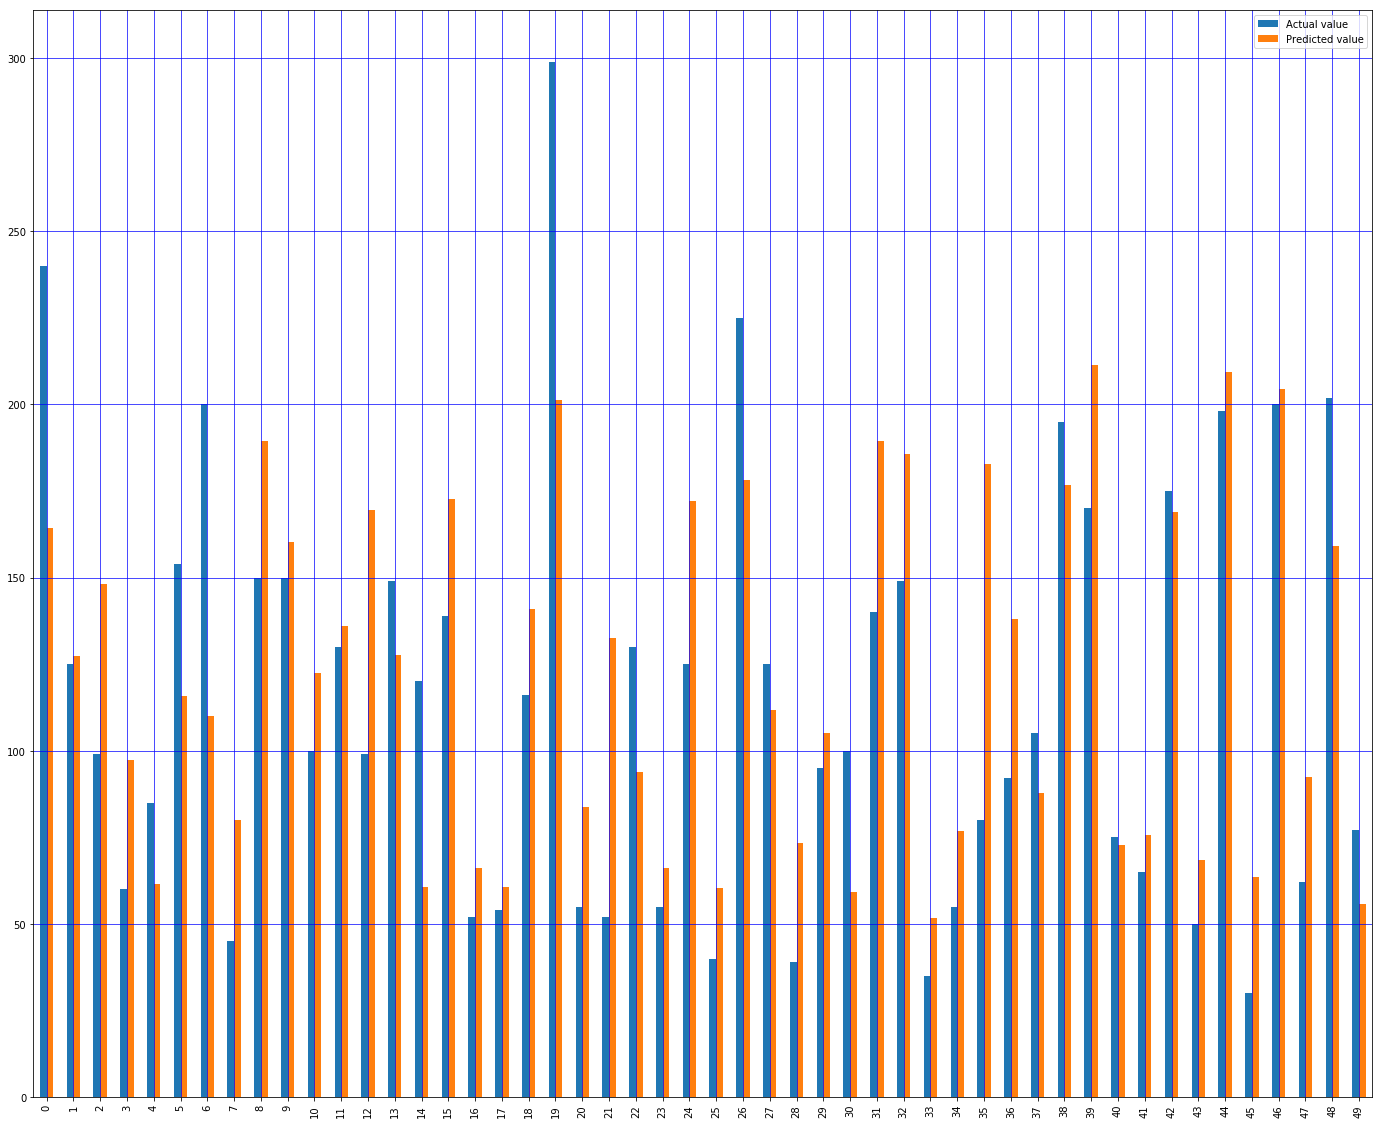

In [0]:
aa = error_frame[:50]
aa.plot(kind='bar',figsize=(24,20))
plt.grid(which='major', linestyle='-', linewidth='0.7', color='green')
plt.grid(which='major', linestyle='-', linewidth='0.7', color='blue')
plt.show()

# EVALUATION

After running both models, we used sklearn.metric to evaluate the efficiency of each model. Since the algorithm is regression, so we cannot use the recall rate, accuracy rate, but choose MSE and R2score. For comparison, we computed and scored for both the training set and test set.
In statistics, the mean squared error is the average squared difference between the estimated values and the actual value. 
MSE is a loss function corresponding to the expected value of the squared error loss. The smaller the loss function, the better the prediction results.
 
R Squared refers to the coefficient of determination. It illustrates how well the prediction result fits the sample dataset. The larger the value, the better the model fitting effect. In the case of regression, the R squared ranges from 0 to 1, and if closer to 1, the model fits well.



Analysis: we choosed one predition results for analysis
Decision tree has a disappointed performance, 
this is the performance of DecisionTree 
******************************
MSE train: 1581.170, test: 1557.403
R^2 train: 0.528, test: 0.523


While the result of knn is a little better than decision tree.
this is the performance of KNN 
******************************
MSE train: 1373.404, test: 1574.086
R^2 train: 0.590, test: 0.51

Decision Tree R2score is 0.528, which has lower efficiency than KNN model; it means the prediction result is nearly half to half. Maybe we should consider improving the parameters of this model to avoid overfitting; even some minor variables can affect the model.
The performance KNN is 0.590, which tends to be more reliable. We think that may because some column in the dataset is out of mathematical theoretical assumption, such as latitude and longitude.

# Conclusion

To sum up, we discovered interesting attributes and relationships among attributes. However, to improve the efficiency of the data model, a more complicated model, such as Neural Network, which tends to be more specific and effective. Because that one outstanding feature of this model is that it takes the weight of each correlated attribute into account, and mimic human brain thinking. Even Neural Network can eliminate the influence of missing values. One improvement for the data models is that the valid values need to be applied. Removing the outlier may remove some valid values, while some invalid values may be still in the dataset. Another improvement can be made further is that additional objective ‘reviews’ should be applied to the data model for 'top hosts'.  To be specific, numeric attributes, such as positive and negative numeric reviews or percentage reviews, can more objectively reflect the best or worst popularity of the hosts or the tenements.

# Ethical

This project entirely takes privacy and utilitarianism into consideration. Before beginning the project, we wondered if the dataset of New York Airbnb has been misused.
 
After we set the goal to predict the price, we determined price is affected by location and room type. Therefore, it is not ethic to explore and model according to specific human name or detailed address. 
In the aspect of utilitarianism, predicting price can bring benefits to human.
The core of utilitarianism is that a good or a bad ethic to a great extent depends on the outcome, that is so-called consequentialism.
 
It is no doubt that predictions that do not involve privacy are an ethical thing. It can predict the price of a specific area to help tenants find the best housing and provide pricing guidance for the landlord.